### 1. 入出力がある場合の異常検知の考え方
1. 系は、入力$\boldsymbol{x}$が与えられたときに、値$f(\boldsymbol{x})$を出力として返すように設計されている
2. したがって、ある任意の観測値$\boldsymbol{x}'$が与えられたときに期待される出力値は$f(\boldsymbol{x}')$である
3. もし、出力の実測値$y'$が、期待値$f(\boldsymbol{x}')$と大幅にずれていたら異常を疑う

例えば、次のようなモデルを設定できる。
$$
p(y|\boldsymbol{x})=N(y|f(\boldsymbol{x}),\sigma^2)
$$
実際の観測値は、期待値$f(\boldsymbol{x})$の周りに、分散$\sigma^2$の正規分布でばらつくと考える。  
問題は、関数$f$およびパラメータ$\sigma^2$をどうデータから学習するか、という点である。これは、任意の入力$\boldsymbol{x}$に対してその出力$y$の確率分布を求める問題である。この問題を、回帰問題と呼ぶ。  
  
異常検知の手順は次の通りになる。
1. 準備:　系の機構ないし動作についての事前知識を基に、入力と出力の間に成り立つであろう関数系$y=f(\boldsymbol{x})$を、なにかのパラメータを含んだ形で仮定しておく。また、出力値のばらつきについての事前知識を基に、適切な観測モデルを仮定しておく。
2. ステップ1(分布推定):　データ$D$を基に回帰問題を解き、関数$f$のパラメータを求める。それにより、任意の$\boldsymbol{x}$が与えられたときの、$y$の予測分布$p(y|\boldsymbol{x},D)$を求める
3. ステップ2(異常度の定義):　典型的には、予測分布を基に、新たに観測された1点$(y',\boldsymbol{x}')$に対する負の対数尤度$-\ln p(y'|\boldsymbol{x}',D')$を異常度とする
4. ステップ3(閾値の設定):　可能なら異常度についての確率分布を用いて、それが難しければ訓練データに基づく分位点の情報を使って、適切な閾値を与え、異常を判定する

### 2. 線形回帰モデルによる異常検知
線形回帰モデルでは関数$f$として次のような1次関数を考える。
$$
f(\boldsymbol{x})=\alpha_0+\boldsymbol{\alpha}^T\boldsymbol{x}=\alpha_0+\alpha_1x_1+\cdots+\alpha_Mx_M
$$
$\alpha_0,\cdots,\alpha_M$の$M+1$個の係数は、データから定められるべき定数である。  
データ$D$を基に、確率モデル
$$
\begin{align}
p(y|\boldsymbol{x})&=N(y|\alpha_0+\boldsymbol{\alpha}^T\boldsymbol{x},\sigma^2)\\
&=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\bigl[-\frac{1}{2\sigma^2}(y-\alpha_0-\boldsymbol{\alpha}^T\boldsymbol{x})^2 \bigr]
\end{align}
$$
に含まれるパラメータ$\alpha_0,\boldsymbol{\alpha}$と$\sigma^2$の最もよさそうな値を1つ決めるという問題を考える。  
下記のような量を定義しておく。
$$
\boldsymbol{y}_N=[y^{(1)},\cdots,y^{(N)}]^T\\
X=[\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(N)}]
$$
$\boldsymbol{y}_N$は$N$次元の列ベクトル、$X$は$M×N$次元のデータ行列である。$X$は**計画行列**とも呼ばれる。
#### 最小二乗法としての最尤推定
$N$個の観測値が統計的に独立であるとの想定の下では、尤度関数は$N$個の標本の寄与の積として次のように定義される。
$$
p(D|\alpha_0,\boldsymbol{\alpha},\sigma^2)=\prod_{n=1}^NN(y^{(n)}|\alpha_0+\boldsymbol{\alpha}^T\boldsymbol{x}^{(n)},\sigma^2)
$$
対数尤度関数は次のようになる。
$$
L(\alpha_0,\boldsymbol{\alpha},\sigma^2|D)=-\frac{N}{2}\ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}\sum_{n=1}^N\bigl[y^{(n)}-\alpha_0-\boldsymbol{\alpha}^T\boldsymbol{x}^{(n)} \bigr]^2
$$
上式を$\alpha_0$で微分して0と等値することにより、$\alpha_0$に最尤解を求める。
$$
\hat{\alpha_0}=\frac{1}{N}\sum_{n=1}^N\bigl[y^{(n)}-\boldsymbol{\alpha}^T\boldsymbol{x}^{(n)} \bigr]=\bar{y}-\boldsymbol{\alpha}^T\bar{\boldsymbol{x}}
$$
ここで、$y$と$\boldsymbol{x}$それぞれについて標本平均を
$$
\bar{y}=\frac{1}{N}\sum_{n=1}^Ny^{(n)}\\
\bar{\boldsymbol{x}}=\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}^{(n)}
$$
と定義した。
入力・出力をそれぞれ中心化した
$$
\tilde{\boldsymbol{y}}_N=H_N\boldsymbol{y}_N=[y^{(1)}-\bar{y},\cdots,y^{(N)}-\bar{y}]^T\\
\tilde{X}=XH_N=[\boldsymbol{x}^{(1)}-\bar{\boldsymbol{x}},\cdots,\boldsymbol{x}^{(N)}-\bar{\boldsymbol{x}}]
$$
を定義して、対数尤度の式に代入する。
$$
L(\boldsymbol{\alpha},\sigma^2|D)=-\frac{N}{2}\ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}|\tilde{\boldsymbol{y}}_N-\tilde{X}^T\boldsymbol{\alpha}|^2
$$
$\boldsymbol{\alpha}$に依存するのは最後の項だけなので、
$$
|\tilde{\boldsymbol{y}}_N-\tilde{X}^T\boldsymbol{\alpha}|^2=\sum_{n=1}^N\bigl[y^{(n)}-\bar{y}-\boldsymbol{\alpha}^T(\boldsymbol{x}^{(n)} -\bar{\boldsymbol{x}})\bigr]^2→最小化
$$
という最適化問題を解くことになる。  
これはいわゆる平均二乗誤差(の$N$倍)に他ならない。すなわち、係数$\alpha$についての最尤推定は最小二乗法と等価である。  
左辺を整理すると
$$
\tilde{\boldsymbol{y}}_N^T\tilde{\boldsymbol{y}}_N-2\boldsymbol{\alpha}^T\tilde{X}\tilde{\boldsymbol{y}}_N+\boldsymbol{\alpha}^T\tilde{X}\tilde{X}^T\boldsymbol{\alpha}
$$
これを$\boldsymbol{\alpha}$で微分してゼロベクトルを等値とすると、
$$
-2\tilde{X}\tilde{\boldsymbol{y}}_N+2\tilde{X}\tilde{X}^T\boldsymbol{\alpha}=\boldsymbol{0}
$$
$\tilde{X}\tilde{X}^T$が正則であると仮定すれば、$\boldsymbol{\alpha}$の最尤解$\hat{\boldsymbol{\alpha}}$が
$$
\hat{\boldsymbol{\alpha}}=[\tilde{X}\tilde{X}^T]^{-1}\tilde{X}\tilde{\boldsymbol{y}}_N
$$
のように得られる。この解は**普通の最小二乗法**による解と呼ばれる。  
$\sigma^2$の最尤解については$\sigma^{-2}$で微分して0と等値することにより
$$
\hat{\sigma}^2=\frac{1}{N}\sum_{n=1}^N\bigl[y^{(n)}-\bar{y}-\hat{\boldsymbol{\alpha}}^T(\boldsymbol{x}^{(n)} -\bar{\boldsymbol{x}})\bigr]^2
$$
となる。
#### 異常度の定義
観測量$(y',\boldsymbol{x}')$についての異常度は、この1点に関する負の対数尤度を基にして
$$
a(y',\boldsymbol{x}')=\frac{1}{\hat{\sigma}^2}\bigl[y'-\bar{y}-\hat{\boldsymbol{\alpha}}^T(\boldsymbol{x}'-\bar{\boldsymbol{x}})\bigr]^2
$$
のように定義できる。  
$\tilde{X}\tilde{X}^T$に多重共線性がある場合、逆行列が計算不能になる。  
実用上はほとんど、リッジ回帰による解を使うことが推奨される。

### 3. リッジ回帰モデルと異常検知
#### リッジ回帰の解
変数の間に近似的にせよなにか線形の関係式がある場合、行列$\tilde{X}\tilde{X}^T$の階数$M$より小さくなり、ゼロ固有値が生じる。  
固有値がゼロにならないように対角要素に小さな数を足すことでこれを防ぐ。  
最小二乗法の解の代わりに
$$
\hat{\boldsymbol{\alpha}}_{ridge}=[\tilde{X}\tilde{X}^T+\lambda I_M]^{-1}\tilde{X}\tilde{\boldsymbol{y}}_N
$$
を使うことで問題が解決される。$\lambda$はある定数、$I_M$は$M$次元の単位行列である。  
これで多重共線性があってもつねに解が計算可能となる。この式で推定するモデルを**リッジ回帰**と呼ぶ。
この解は、最適化問題
$$
|\tilde{\boldsymbol{y}}_N-\tilde{X}^T\boldsymbol{\alpha}|^2+\lambda\boldsymbol{\alpha}^T\boldsymbol{\alpha}→最小
$$
の解になっている。  
第2項は$\boldsymbol{\alpha}$の要素が極端に大きくなることを防ぐ罰則項のような働きをしていると解釈できる。  
このような付加項を**正則化項**と呼ぶ。この場合、**$L_2$正則化**とも呼ばれる。

#### 定数$\lambda$の決定
>定理1(リッジ回帰の1つ抜き交差確認誤差)  
第$n$番目の標本を抜いて計算したリッジ回帰の回帰係数を$\boldsymbol{\alpha}^{(-n)}$と表すと、これは次のように表せる。
$$
\hat{\boldsymbol{\alpha}}^{(-n)}=[\tilde{X}\tilde{X}^T-\tilde{\boldsymbol{x}}^{(n)}\tilde{\boldsymbol{x}}^{(n)T}+\lambda I_M]^{-1}(\tilde{X}\tilde{\boldsymbol{y}}_N-\tilde{\boldsymbol{x}}^{(n)}\tilde{y}^{(n)})
$$
ただし$\tilde{y}^{(n)}=y^{(n)}-\bar{y}$および$\tilde{\boldsymbol{x}}^{(n)}=\boldsymbol{x}^{(n)}-\bar{\boldsymbol{x}}$である。  
このとき、1つ抜き交差確認法による二乗誤差
$$
e(\lambda)=\frac{1}{N}\sum_{n=1}^N\bigl[\tilde{y}^{(n)}-\tilde{\boldsymbol{x}}^{(n)T}\hat{\boldsymbol{\alpha}}^{(-n)} \bigr]^2
$$
は次式を満たす。
$$
e(\lambda)=\frac{1}{N}|diag(I_M-H)^{-1}(I_M-H)\tilde{\boldsymbol{y}}_N|^2
$$
ただし行列$H$は次式で定義される。
$$
H=\tilde{X}^T(\tilde{X}\tilde{X}^T+\lambda I_M)^{-1}\tilde{X}
$$
また、$diag(I_M-H)^{-1}$は、第$i$対角要素が$(1-H_{i,i})^{-1}$となる対角行列である。

あらかじめ何種類かの$\lambda$を用意しておいてそれぞれ$e(\lambda)$を計算して最小となるものが最善の値となる。  
ここで、逆行列の部分を、ウッドベリー行列恒等式
$$
[A-BD^{-1}C]^{-1}=A^{-1}+A^{-1}B[D-CA^{-1}B]^{-1}CA^{-1}
$$
において、$A→(\tilde{X}\tilde{X}^T+\lambda I_M),D→1,B→\tilde{\boldsymbol{x}}^{(n)},C→\tilde{\boldsymbol{x}}^{(n)T}$とおくと、$H_{n,n}=\tilde{\boldsymbol{x}}^{(n)T}A^{-1}\tilde{\boldsymbol{x}}^{(n)}$に注意して
$$
\begin{align}
[\cdots]^{-1}&=A^{-1}+A~{-1}\tilde{\boldsymbol{x}}^{(n)}[1-\tilde{\boldsymbol{x}}^{(n)T}A~{-1}\tilde{\boldsymbol{x}}^{(n)}]^{-1}\tilde{\boldsymbol{x}}^{(n)T}A~{-1}\\
&=\biggl[I_M+\frac{A^{-1}\tilde{\boldsymbol{x}}^{(n)}\tilde{\boldsymbol{x}}^{(n)T}}{1-H_{n,n}} \biggr]A^{-1}
\end{align}
$$
となることが分かる。  
二乗誤差の式の右辺に現れる内積の項を次のように計算できる。
$$
\tilde{\boldsymbol{x}}^{(n)T}\boldsymbol{\alpha}^{(-n)}=\frac{1}{1-H_{n,n}}\bigl[\tilde{\boldsymbol{x}}^{(n)T}A^{-1}\tilde{X}\tilde{\boldsymbol{y}}_N - H_{n,n}\tilde{y}^{(n)} \bigr]
$$
このことから
$$
\tilde{y}^{(n)}-\tilde{\boldsymbol{x}}^{(n)T}\boldsymbol{\alpha}^{(-n)}=\frac{1}{1-H_{n,n}}\bigl[\tilde{y}^{(n)} - \tilde{\boldsymbol{x}}^{(n)T}A^{-1}\tilde{X}\tilde{\boldsymbol{y}}_N \bigr]
$$
が成り立つことが分かる。したがって、$\hat{\boldsymbol{\alpha}}_{ridge}$を使うと、
$$
e(\lambda)=\frac{1}{N}\sum_{n=1}^N\frac{1}{(1-H_{n,n})^2}\bigl[\tilde{y}^{(n)} - \tilde{\boldsymbol{x}}^{(n)T}\hat{\boldsymbol{\alpha}}_{ridge} \bigr]^2
$$
となる。
**一般化交差確認法**と呼ばれる手法では、
$$
e_{GCV}(\lambda)=\frac{1}{N}\frac{|(I_M-H)\tilde{\boldsymbol{y}_N}|^2}{[1-Tr(H)/N]^2}
$$
が最小になる$\lambda$を選ぶ。
#### 異常度の定義
パラメータ$\sigma^2$についてはリッジ回帰の場合、次の式から計算するのが妥当である。
$$
\hat{\sigma}^2_{ridge}=\frac{1}{N}\biggl\{\hat{\lambda}\hat{\boldsymbol{\alpha}}_{ridge}^T\hat{\boldsymbol{\alpha}}_{ridge}+\sum_{n=1}^N\bigl[\tilde{y}^{(n)} - \hat{\boldsymbol{\alpha}}_{ridge}^T\tilde{\boldsymbol{x}}^{(n)} \bigr]^2 \biggr\}
$$
以上の結果から異常度は、普通の最小二乗法と同様、観測量$(y',\boldsymbol{x}')$という1点における負の対数尤度を基にして
$$
a(y',\boldsymbol{x}')=\frac{1}{\hat{\sigma}^2_{ridge}}[y'-\bar{y}-\hat{\boldsymbol{\alpha}}_{ridge}^T(\boldsymbol{x}'-\bar{\boldsymbol{x}})]^2
$$
のように定義できる。
訓練標本数$N$が次元$M$に比べて大きくないときは異常度を
$$
a^{(n)}=\frac{1}{(1-H_{n,n})^2\hat{\sigma}^2_{ridge}}[y^{(n)}-\bar{y}-\hat{\boldsymbol{\alpha}}_{ridge}^T(\boldsymbol{x}^{(n)}-\bar{\boldsymbol{x}})]^2
$$
のように変形して使う。

>手順1(線形回帰のリッジ解による異常検知)  
>1. 訓練時:　$\lambda$の候補をいくつかあらかじめ挙げておく  
　a.　$\lambda$の候補のそれぞれについて、$e(\lambda)$か$e_{GCV}(\lambda)$を計算し、最小の評価値を与える$\lambda$を記憶する  
　b.　回帰係数$\hat{\boldsymbol{\alpha}}_{ridge}$を計算し記憶する  
　c.　$\hat{\sigma}^2_{ridge}$を計算し記憶する  
　d.　各標本$(\boldsymbol{x}^{(n)},y^{(n)})$について、異常度$a(y^{(n)},\boldsymbol{x}^{(n)})$を計算し、異常度の閾値$a_{th}$を計算し記憶する > 
>2. 運用時:  
　a.　観測データ$(\boldsymbol{x}',y')$に対して、異常度$a(y',\boldsymbol{x}')$を計算する  
　b.　$a(y',\boldsymbol{x}')>a_{th}$なら異常と判定、警報を発する

lambda:  2.25


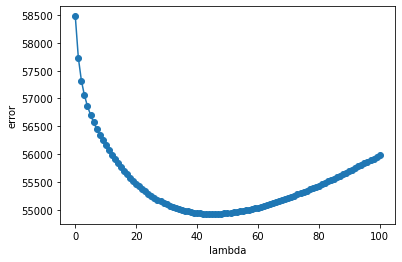

alpha:  [ 9.69334851e+01  1.41520624e+02  1.75384674e+02  9.60113390e+01
  2.37579475e+00  6.79589310e+01 -1.13580275e+01  3.86050375e+01
 -7.74204372e+01  1.14754836e+02  5.57785147e+01  2.08882942e+02
 -8.92840971e+01 -1.79437939e+00  9.59232693e-14]
threshold:  26.43706218707306


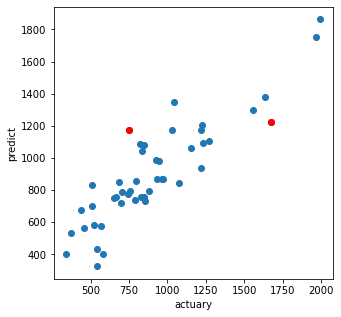

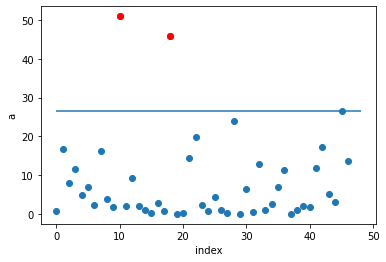

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/tanak/study/参考書/機械学習による異常検知/USCrime.csv')
y = data['y']
X = data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]

# 中心化
Xc = ((X - X.mean())/X.std())
yc = (y - y.mean())

# サンプル数と説明変数の数
N = len(y)
M = Xc.shape[1]

e_list = []
x = np.array(Xc)

# λの候補
lmd_list = np.linspace(0,5,101)

# λの探索
# 一般化交差確認法の式に従って各λの二乗誤差を求める
for lmd in lmd_list:
    x_ = x.T
    M = x_.shape[0]
    H = x_.T @ np.linalg.solve(x_@x_.T + lmd*np.eye(M), x_)
    e = np.sum(((np.eye(N)-H)@yc)**2) / ((1-np.trace(H)/N)**2)/N
    e_list.append(e)

# 二乗誤差の最も低いものを選択
bestIdx = np.argmin(e_list)
lam = lmd_list[bestIdx]
print('lambda: ', lam)

# 各λに対する二乗誤差のプロット
plt.plot(e_list, '-o');
plt.xlabel('lambda')
plt.ylabel('error')
plt.show()

# 回帰係数αの計算
x_= np.vstack((x.T, np.ones((1,47))))
alpha = np.linalg.inv(x_@x_.T + lam*np.eye(M+1)) @ x_ @ yc
print('alpha: ', alpha)

# 予測値
y_pred = x_.T @ alpha  +y.mean()

# σ2の計算
sig2 = (lam*((np.sum(alpha[:14]**2))) + np.sum(y_pred - y)**2)/N

# 異常度の計算
H = x_.T@ np.linalg.inv((x_@x_.T + lam*np.eye(M+1))) @ x_
TrHN = np.sum(np.diag(H))/N
a = (y_pred - y)**2 / ((1-TrHN)**2*sig2)

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(yc+y.mean(), y_pred, 'o')
plt.plot(yc[a>th]+y.mean(), y_pred[a>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(a, 'o')
plt.plot(a[a>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

alpha:  [[ 0.22958401  0.3009753   0.40060974  0.27725386  0.0210136   0.18265656
  -0.01005251  0.11306707 -0.16872062  0.25547365  0.11675938  0.4474839
  -0.21894004  0.00117239]]
threshold:  15.185419005826628


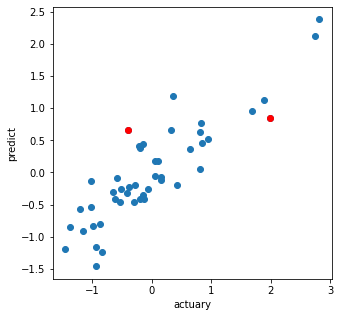

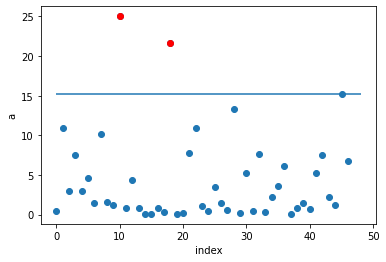

In [718]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import LeaveOneOut

Xc = np.array(((X - X.mean())/X.std()))
yc = np.array((y - y.mean())/y.std())

# ridgeCVでλの探索を行う
ridge = RidgeCV(alphas=lmd_list[1:]).fit(np.array(Xc), yc.reshape(-1,1))

# 回帰係数αの計算
alpha = ridge.coef_
print('alpha: ', alpha)

# 予測値
y_pred = Xc @ alpha.T

# σ2の計算
sig2 = (lam*((np.sum(alpha[:14]**2))) + np.sum(y_pred[:,0] - yc)**2)/N

# 異常度の計算
H = Xc.T@ np.linalg.inv((Xc@Xc.T + lam*np.eye(M))) @ Xc
TrHN = np.sum(np.diag(H))/N
a = (y_pred[:,0] - yc)**2 / ((1-TrHN)**2*sig2)

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(yc, y_pred, 'o')
plt.plot(yc[a>th], y_pred[a>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(np.arange(M), a, 'o')
plt.plot(np.arange(M)[a>th], a[a>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

### 4. 偏最小二乗法と統計的プロセス制御(1次元出力)
統計的プロセス制御(SPC)は、広義には統計学的な手法を使って工場などの状態監視を行うことを指す言葉であるが、狭義には、入力と出力がある系において、両者の関係が正常範囲にあるべく状態監視を行うことを指す。  
**偏最小二乗法(PLS)**は統計的プロセス制御の標準的手法である。  
偏最小二乗法では、出力変数を最もよく説明すると思われる変数を選択的に使うことで、解の安定性と精度の両立を計る。  
データとして入力と出力の組$D=\{(\boldsymbol{x}^{(1)},y^{(1)}),(\boldsymbol{x}^{(2)},y^{(2)}),\cdots,(\boldsymbol{x}^{(N)},y^{(N)})\}$が与えられているとする。  
ここで、$\boldsymbol{x},y$は平均0,分散1になるように標準化されているとする。これらのデータの時間軸上での相関は無視できるものとし、$N$個は統計的に独立とする。また、各$\boldsymbol{x}^{(n)}$は$M$次元ベクトルとする。  
偏最小二乗法では、$m$個の正規直交基底($m<M$)
$$
\boldsymbol{p}_1,\boldsymbol{p}_2,\cdots,\boldsymbol{p}_m\ ここで\ \boldsymbol{p}_i^T\boldsymbol{p}_j=\delta_{i,j}
$$
を使って変換した$\boldsymbol{x}$を使って線形回帰の問題を解く。    
問題は以下の2つにある。  
(1)基底$\boldsymbol{p}_1,\boldsymbol{p}_2,\cdots,\boldsymbol{p}_N$を、出力変数を最も効率よく表せるように選ぶこと  
(2)それらの基底を使って線形回帰モデルを表現し、対応する回帰係数を求めること  
#### 正規直交基底による回帰モデルの変換
第2の問題から考える。  
$\boldsymbol{x}$の代わりに$\boldsymbol{r}=P^T\boldsymbol{x}$を新しい変数として使う。  
ここで、$P=[\boldsymbol{p}_1,\cdots,\boldsymbol{p}_m]$である。  
系のモデルとして、
$$
y=\beta_1r_1+\cdots+\beta_mr_m=\boldsymbol{\beta}^T\boldsymbol{r}
$$
というものを考える。標準化されたデータであるから$y$切片に当たる項が出てこない。$\boldsymbol{\beta},\boldsymbol{r}$ともに$m$次元である。  
今回の問題は、係数$\boldsymbol{\beta}$を$P$により変換されたデータ
$$
\{(\boldsymbol{r}^{(1)},y^{(1)}),\cdots,(\boldsymbol{r}^{(N)},y^{(N)}) \}
$$
を用いて決めることである。  
解き方は、普通の最小二乗法と同じである。二乗誤差
$$
\sum_{n=1}^N\bigl[y^{(n)}-\boldsymbol{\beta}^T\boldsymbol{r}^{(n)} \bigr]^2
$$
を最小化するように$\boldsymbol{\beta}$を決める。  
$\boldsymbol{\beta}$で微分して$\boldsymbol{0}$と等値とすると。
$$
\boldsymbol{0}=2\sum_{n=1}^Nbigl[y^{(n)}-\boldsymbol{\beta}^T\boldsymbol{r}^{(n)} \bigr](-\boldsymbol{r}^{(n)})
$$
となるから、$\boldsymbol{r}^{(n)}=P^T\boldsymbol{x}^{(n)}$を使って、
$$
\hat{\boldsymbol{r}}_{PLS}=\bigl[P^TXX^TP \bigr]^{-1}P^TX\boldsymbol{y}_N
$$
が得られる。  
たとえば$R=P^TX$とおくと$\hat{\boldsymbol{r}}_{PLS}=[RR^T ]^{-1}R\boldsymbol{y}_N$となる。$RR^T$の部分は$m×m$行列となる。  
#### NIPALS法(1次元出力)
偏最小二乗法では
$$
\left(\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(N)}
\end{array}\right)と
\left(\begin{array}{c}
x_1^{(1)}\\
x_1^{(2)}\\
\vdots\\
x_1^{(N)}
\end{array}\right)c_1+
\left(\begin{array}{c}
x_2^{(1)}\\
x_2^{(2)}\\
\vdots\\
x_2^{(N)}
\end{array}\right)c_2+
\cdots +
\left(\begin{array}{c}
x_M^{(1)}\\
x_M^{(2)}\\
\vdots\\
x_M^{(N)}
\end{array}\right)c_M
$$
の重なりが最大化されるよう係数$c_1,\cdots,c_M$を決定し、基底$\boldsymbol{p}_1$を$[c_1,\cdots,c_M]^T$のように求める。  
一つ基底を決めたら、それで合わせきれなかった部分を次の基底$\boldsymbol{p}_2$で、さらに次、というように基底を決めていく。  
「重なり」の度合いを内積で測るとすれば、一つの基底$\boldsymbol{p}$を求める問題は次のように書ける。  
$$
\max_{\boldsymbol{c}}\{\boldsymbol{y}_N^TX^T\boldsymbol{c}\}\ subject\ to\ \boldsymbol{c}^T\boldsymbol{c}=1
$$
ラグランジュ乗数$\lambda$を使って拘束条件を取り込むことで、最適性の条件は次のように書ける。
$$
X\boldsymbol{y}_N-2\lambda\boldsymbol{c}=0
$$
この解は
$$
\frac{X\boldsymbol{y}_N}{|X\boldsymbol{y}_N|}
$$
であり、これが1本目の基底$\boldsymbol{p}_1$となる。  
2本目の基底$\boldsymbol{p}_2$を求めるために、$\boldsymbol{d}_1=X^T\boldsymbol{p}_1/|X^T\boldsymbol{p}_1|$としたとき
$$
X^T\boldsymbol{c}-\boldsymbol{d}_1\boldsymbol{d}_1^T(X^T\boldsymbol{c})\ すなわち\ [X^T-\boldsymbol{d}_1\boldsymbol{d}_1^TX^T]\boldsymbol{c}
$$
を考える。すなわち事前にデータ行列を
$$
X←X-X\boldsymbol{d}_1\boldsymbol{d}_1^T
$$
として、$\boldsymbol{p}_1$と同様の手順で$\boldsymbol{p}_2$を求める。
手順を以下にまとめる。この算法は**NIPALS**と呼ばれる。

>手順2(NIPALS法による回帰モデル(1変数入力))  
>1. 訓練時  
　a. 入力：データ行列$X$、出力のベクトル$\boldsymbol{y}_N$、基底の数$m$  
　b. 出力：基底ベクトルの行列$P=[\boldsymbol{p}_1,\boldsymbol{p}_2,\cdots,\boldsymbol{p}_m]$  
　c. 計算手順：$i=1,2,\cdots,m$に対して以下を繰り返す  
$$
\boldsymbol{p}_i=\frac{X\boldsymbol{y}_N}{|X\boldsymbol{y}_N|}\\
\boldsymbol{d}_i=\frac{X^T\boldsymbol{p}_i}{|X^T\boldsymbol{p}_i|}\\
X←X-X\boldsymbol{d}_i\boldsymbol{d}_i^T
$$
　d. 回帰係数$\hat{\boldsymbol{\beta}}_{PLS}=[P^TXX^TP]^{-1}P^TX\boldsymbol{y}_N$を求めておく  
>2. 予測時  
　a. 入力$\boldsymbol{x}$  
　b. 出力$y=\hat{\boldsymbol{\beta}}_{PLS}P^T\boldsymbol{x}$

#### 異常度の定義と異常検知手順
>手順3(線形回帰の偏最小二乗解による異常検知)  
>1. 訓練時：異常度の確率分布をデータから学習する  
　a. 基底の行列$P$により変換された訓練データ$(\boldsymbol{r}^{(1)},y^{(1)}),\cdots,(\boldsymbol{r}^{(N)},y^{(N)})$から、回帰係数$\hat{\boldsymbol{\beta}}_{PLS}$と、観測のばらつき
$$
\hat{\sigma}_{PLS}^2=\frac{1}{2}\sum_{n=1}^N\bigl[y^{(N)}- \hat{\boldsymbol{\beta}}_{PLS}^T\boldsymbol{r}^{(N)} \bigr]^2
$$
を求める。
　b. 各標本について、異常度を次式を使って計算する。
$$
a(y,\boldsymbol{x})=\frac{1}{\hat{\sigma}_{PLS}^2}\bigl[y- \hat{\boldsymbol{\beta}}_{PLS}^TP\boldsymbol{x} \bigr]^2
$$
　c. モーメント法を用いて、計算された異常度$a^{(1)},\cdots,a^{(N)}$に対してカイ二乗分布$\chi(\hat{m}_{mo},\hat{s}_{mo})$を当てはめる。  
>2. 運用時：当てはめられたカイ二乗分布を基に、異常度の閾値$a_{th}$を求めておく  
　a. 観測データ$(\boldsymbol{x}',y')$に対して、異常度$a(y',\boldsymbol{x}')$を計算する。
　b. $a(y',\boldsymbol{x}')>a_{th}$なら異常と判定、警報を発する


N: 47  M: 14  m: 5
threshold:  0.00038601281526667153


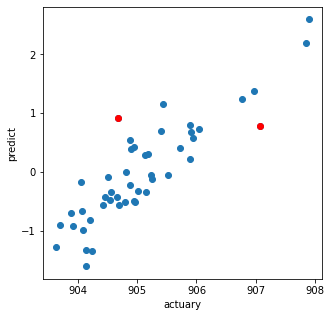

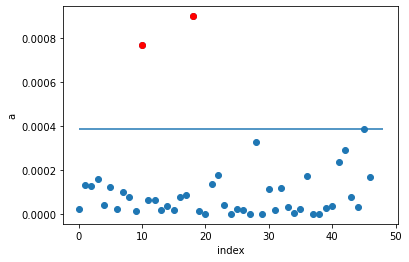

In [723]:
# 改めてデータを読み込む
data = pd.read_csv('C:/Users/tanak/study/参考書/機械学習による異常検知/USCrime.csv')
y = data['y']
X = data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]

# 標準化
Xc = np.array(((X - X.mean())/X.std())).T
yc = np.array((y - y.mean())/y.std()).reshape((47,1))

# 各次元
N = len(y)
M = Xc.shape[0]
m = 5 # 削減後の次数の設定
print('N:',N,' M:',M,' m:',m)

# NIPLAS法
X_new = Xc
P = []
for i in range(m):
    p = X_new@yc/np.linalg.norm(X_new@yc, ord=2)
    d = X_new.T@p/np.linalg.norm(X_new.T@p, ord=2)
    P.append(p)
    X_new = Xc - Xc@(d@d.T) # Xを更新する
# 基底ベクトル
P = np.array(P)[:,:,0].T    

# 回帰係数の計算
beta = np.linalg.inv(P.T@Xc@Xc.T@P)@P.T@Xc@yc

# 予測値
ypls = beta.T@(P.T@Xc)
ypls = ypls[0]

# σ2の計算
s2 = np.sum((yc - ypls.T)**2)/2

# 異常度の計算
a_pls = (yc.T - ypls.T)**2/s2
a_pls = a_pls[0]

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a_pls)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(yc+y.mean(), ypls, 'o')
plt.plot(yc[a_pls>th]+y.mean(), ypls[a_pls>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(np.arange(N), a_pls, 'o')
plt.plot(np.arange(N)[a_pls>th], a_pls[a_pls>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

threshold:  0.14500313044869706


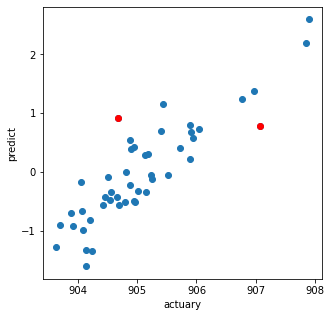

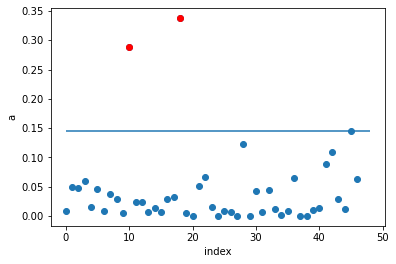

In [730]:
from sklearn.cross_decomposition import PLSRegression

# PLS回帰
reg = PLSRegression(n_components=5)
reg.fit(Xc.T, yc)

# σ2の計算
s2 = np.sum((yc - reg.predict(Xc.T))**2)/2

# 異常度の計算
a_pls = (yc - reg.predict(Xc.T)).T[0]**2/s2

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a_pls)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(yc+y.mean(), ypls, 'o')
plt.plot(yc[a_pls>th]+y.mean(), ypls[a_pls>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(np.arange(N), a_pls, 'o')
plt.plot(np.arange(N)[a_pls>th], a_pls[a_pls>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

### 5. 正準相関分析による異常検知
偏最小二乗法では、出力が1変数の場合のみを考えたが、ここでは多出力に拡張することを考える。正準相関分析という手法を説明する。 
$M$次元の変数$\boldsymbol{x}$と$L$次元の変数$\boldsymbol{y}$があり、それらが組として$N$個
$$
D=\{(\boldsymbol{x}^{(1)},y^{(1)}),\cdots,(\boldsymbol{x}^{(N)},y^{(N)}) \}
$$
のように観測されているとする。  
たとえば、ある装置のパラメータ$\boldsymbol{x}$と、その出力として得られるセンサー値$\boldsymbol{y}$があるとする。正準相関分析とは、パラメータの一次結合
$$
\alpha_1x_1+\alpha_2x_2+\cdots+\alpha_Mx_M\ すなわち\ \boldsymbol{\alpha}^T\boldsymbol{x}
$$
とセンサー出力の一次結合
$$
\beta_1y_1+\beta_2y_2+\cdots+\beta_Ly_L\ すなわち\ \boldsymbol{\beta}^T\boldsymbol{y}
$$
をつくり、両者の相関係数が最大になるように係数$\boldsymbol{\alpha},\boldsymbol{\beta}$を定める問題である。  
#### 一般化固有値問題としての正準相関分析
一次結合をそれぞれ
$$
f=\boldsymbol{\alpha}^T\boldsymbol{x},\ g=\boldsymbol{\beta}^T\boldsymbol{y}
$$
とおく。  
元の変数$\boldsymbol{x}$と$\boldsymbol{y}$の標本平均をそれぞれ$\bar{\boldsymbol{x}}$と$\bar{\boldsymbol{y}}$のように表すと、これらの標本平均は、$\bar{f}=\boldsymbol{\alpha}^T\bar{\boldsymbol{x}}$と$\bar{g}=\boldsymbol{\beta}^T\bar{\boldsymbol{y}}$となる。
$f$と$g$の間の標本共分散の式は
$$
\begin{align}
(fとgの標本共分散)&=\frac{1}{N}\sum_{n=1}^N\boldsymbol{\alpha}^T(\boldsymbol{x}^{(n)}-\bar{\boldsymbol{x}})(\boldsymbol{y}^{(n)}-\bar{\boldsymbol{y}})^T\boldsymbol{\beta}\\
&=\boldsymbol{\alpha}^T\biggl\{\frac{1}{N}\sum_{n=1}^N(\boldsymbol{x}^{(n)}-\bar{\boldsymbol{x}})(\boldsymbol{y}^{(n)}-\bar{\boldsymbol{y}})^T \biggr\}\boldsymbol{\beta}
\end{align}
$$
$\{・\}$の中身は、$M$次元変数$\boldsymbol{x}$と、$L$次元変数$\boldsymbol{y}$の間の共分散行列に対応するものである。  
これを$\Sigma_{xy}$で表すと、
$$
(fとgの標本共分散)=\boldsymbol{\alpha}^T\Sigma_{xy}\boldsymbol{\beta}
$$
となる。  
同様に、$f$と$g$の標本分散もぞれぞれつぎのように表せる。
$$
(fの標本共分散)=\frac{1}{N}\sum_{n=1}^N\boldsymbol{\alpha}^T(\boldsymbol{x}^{(n)}-\bar{\boldsymbol{x}})(\boldsymbol{x}^{(n)}-\bar{\boldsymbol{x}})^T\boldsymbol{\alpha}=\boldsymbol{\alpha}^T\Sigma_{xx}\boldsymbol{\alpha}\\
(gの標本共分散)=\frac{1}{N}\sum_{n=1}^N\boldsymbol{\beta}^T(\boldsymbol{y}^{(n)}-\bar{\boldsymbol{y}})(\boldsymbol{y}^{(n)}-\bar{\boldsymbol{y}})^T\boldsymbol{\beta}=\boldsymbol{\beta}^T\Sigma_{yy}\boldsymbol{\beta}
$$
相関係数の定義から、
$$
r_{fg}=(fとgの相関係数)=\frac{\boldsymbol{\alpha}^T\Sigma_{xy}\boldsymbol{\beta}}{\sqrt{\boldsymbol{\alpha}^T\Sigma_{xx}\boldsymbol{\alpha}}\sqrt{\boldsymbol{\beta}^T\Sigma_{yy}\boldsymbol{\beta}}}
$$
が言える。
分母を一定値に保ったまま、分子を最大にすることを考える。
$$
\max_{\boldsymbol{\alpha},\boldsymbol{\beta}}\{\boldsymbol{\alpha}^T\Sigma_{xy}\boldsymbol{\beta} \}\ subject\ to\ \boldsymbol{\alpha}^T\Sigma_{xx}\boldsymbol{\alpha}=1,\ \boldsymbol{\beta}^T\Sigma_{yy}\boldsymbol{\beta}=1
$$
$\boldsymbol{x}$側と$\boldsymbol{y}$側でそれぞれのばらつきの度合いを標準化した上で、重なりを最大化することを表している。  
ラグランジュ乗数$\lambda$と$\mu$を導入し、ラグランジュ関数
$$
\boldsymbol{\alpha}^T\Sigma_{xy}\boldsymbol{\beta}-\frac{\lambda}{2}\boldsymbol{\alpha}^T\Sigma_{xx}\boldsymbol{\alpha}-\frac{\mu}{2}\boldsymbol{\beta}^T\Sigma_{yy}\boldsymbol{\beta}
$$
を$\boldsymbol{\alpha}$および$\boldsymbol{\beta}$で偏微分して0と等値することにより最適性の条件を得る。  
$$
\boldsymbol{0}=\Sigma_{xy}\boldsymbol{\beta}-\lambda\Sigma_{xx}\boldsymbol{\alpha}\\
\boldsymbol{0}=\Sigma_{yx}\boldsymbol{\alpha}-\mu\Sigma_{yy}\boldsymbol{\beta}
$$
最初の式に左から$\boldsymbol{\alpha}^T$を掛け、第2の式に左から$\boldsymbol{\beta}^T$を掛けて転置したものを引くと
$$
0=\lambda\boldsymbol{\alpha}^T\Sigma_{xx}\boldsymbol{\alpha}-\mu\boldsymbol{\beta}^T\Sigma_{yy}\boldsymbol{\beta}
$$
となる。拘束条件がみたされているかぎり$\lambda$と$\mu$の係数は1であるので、$\lambda=\mu$が成り立つ。  
$\Sigma_{xx}$が正則と仮定して、その逆行列を第1の式に掛けると
$$
\lambda\boldsymbol{\alpha}=\frac{1}{\lambda}\Sigma_{xx}^{-1}\Sigma_{xy}\boldsymbol{\beta}
$$
が成り立つので、これにより第2の式の$\boldsymbol{\alpha}$を消去する。  
$$
\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}\boldsymbol{\beta}=\lambda^2\Sigma_{yy}\boldsymbol{\beta}
$$
同様に$\boldsymbol{\beta}$を消去すると、
$$
\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}\boldsymbol{\alpha}=\mu^2\Sigma_{xx}\boldsymbol{\alpha}
$$
となる。  
両式それぞれ$A\boldsymbol{w}=\omega B\boldsymbol{w}$の形をしており、このような方程式を**一般固有方程式**と呼ぶ。  
これを解くと$(\lambda^1,\boldsymbol{\alpha}^1,\boldsymbol{\beta}^1),(\lambda^2,\boldsymbol{\alpha}^2,\boldsymbol{\beta}^2),\cdots$のように複数の一般化固有値と一般化固有ベクトルの組が出てくる。  
第$i$番目の一般化固有値方程式から$\Sigma_{xy}\boldsymbol{\beta}^i=\lambda^i\Sigma_{xx}\boldsymbol{\alpha}^i$が成り立ち、相関係数の式に代入し、最適化問題の制約条件を使うと、
$$
r_{fg}^i=\lambda^i
$$
であることが分かる。これを第$i$**正準相関係数**と呼ぶ。

#### 特異値分解による解と異常検知
一般化固有値方程式の第1式に左から$\Sigma_{yy}^{-1/2}$を掛け、第2式に左から$\Sigma_{xx}^{-1/2}$を掛けると、以下の固有値方程式が導かれる。
$$
WW^T\tilde{\boldsymbol{\alpha}}=\lambda^2\tilde{\boldsymbol{\alpha}}\ subject\ to\ \tilde{\boldsymbol{\alpha}}^T\tilde{\boldsymbol{\alpha}}=1\\
W^TW\tilde{\boldsymbol{\beta}}=\lambda^2\tilde{\boldsymbol{\beta}}\ subject\ to\ \tilde{\boldsymbol{\beta}}^T\tilde{\boldsymbol{\beta}}=1
$$
ただし、
$$
W=\Sigma_{xx}^{-1/2}\Sigma_{xy}\Sigma_{yy}^{-1/2}\\
\tilde{\boldsymbol{\alpha}}=\Sigma_{xx}^{1/2}\boldsymbol{\alpha}\\
\tilde{\boldsymbol{\beta}}=\Sigma_{yy}^{1/2}\boldsymbol{\beta}
$$
$\tilde{\boldsymbol{\alpha}}$は$W$の左特異ベクトル、$\tilde{\boldsymbol{beta}}$は$W$の右特異ベクトルであることが分かる。  
$\lambda$は$W$の特異値として求まる。  
また、第$i$正準変数が、
$$
f_i=\boldsymbol{x}^T\Sigma_{xx}^{-1/2}\tilde{\boldsymbol{\alpha}}^i\\
g_i=\boldsymbol{y}^T\Sigma_{yy}^{-1/2}\tilde{\boldsymbol{\beta}}^i
$$
のように求められる。
>手順4(正準相関分析による異常検知)  
>1. 訓練時(その1:正準変数を求める)  
　a.行列$W$をつくり、その特異値分解を行う  
　b.$W$の特異ベクトル$(\tilde{\boldsymbol{\alpha}}^i,\tilde{\boldsymbol{\beta}}^i)$を$\lambda^i$の値の大きい順に必要な個数を選ぶ  
>2. 訓練時(その2:回帰モデルをあてはめる)  
　a.正準変数を一組(第$i$正準変数とする)選び、元のデータ$D$から、第$i$正準変数からなるデータ
$$
D_i=\{(f_i^{(1)},g_i^{(1)}),\cdots,(f_i^{(N)},g_i^{(N)}) \}
$$
　をつくる。  
　b.$f_i$と$g_i$について1変数の線形回帰モデルをあてはめる  
　c.異常度を計算し、必要に応じてカイ二乗分布を当てはめるか、分位点を求めるかして閾値を設定する  
　d.上記を正準変数の数だけ繰り返す

threshold:  14.180625676912676


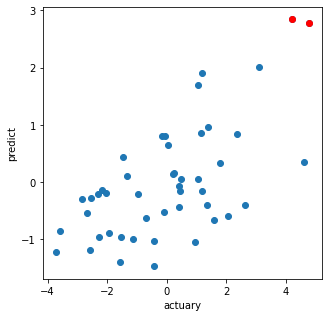

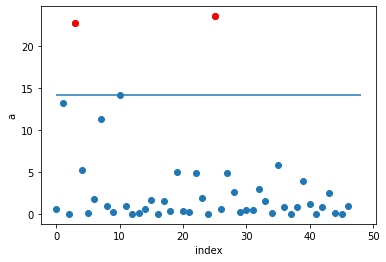

In [13]:
from scipy import linalg

data = pd.read_csv('C:/Users/tanak/study/参考書/機械学習による異常検知/USCrime.csv')
y = data['y']
X = data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]

# 各種次元
dx = 14 # xの次元
dy = 1 # yの次元
N = len(y) # データ数

# 標準化
X_ = np.array(X).T
Xc = (X_ - np.mean(X_, axis=1).reshape(dx,1))/np.std(X_, ddof=0, axis=1).reshape(dx,1)
y_ = np.array(y).reshape(dy,N)
yc = (y_-y_.mean())/y_.std(ddof=0)

# 行列Wを作る
# 分散行列・共分散行列の計算
Sxx = Xc@Xc.T / N
Syy = (yc@yc.T).reshape(dy,dy) / N
Sxy = Xc@yc.T / N

# 定義に従いWの計算
W = linalg.pinv2(linalg.sqrtm(Sxx)) @ Sxy @ linalg.pinv2(linalg.sqrtm(Syy))

# 特異値分解
U, S_diags, V_t = linalg.svd(Sxy, full_matrices=False)

# 正準変数
f1 = (Xc.T@U).reshape(1,N)
g1 = yc.T@V_t

# 回帰係数の計算
alpha1 = linalg.inv(f1@f1.T)@f1@g1

# σ2の計算
sig2 = np.sum((g1 - alpha1*f1.T)**2) / N

# 異常度の計算
a = (g1 - alpha1*f1)**2/sig2
a = a.T[0]

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(f1[0], g1, 'o')
plt.plot(f1[0][a>th], g1[a>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(np.arange(N), a, 'o')
plt.plot(np.arange(N)[a>th], a[a>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

threshold:  0.602193777816374


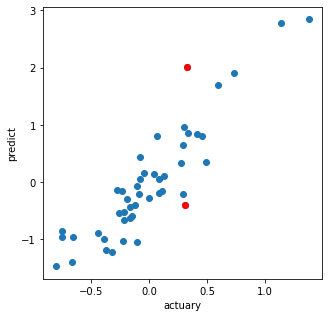

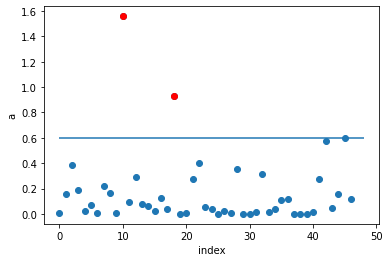

In [10]:
# CCA関数の中身を参考にしたもの
# NIPLAS法
X_pinv = linalg.pinv2(Xc.T, check_finite=False, cond=10*1e-6)
y_pinv = linalg.pinv2(yc.T, check_finite=False, cond=10*1e-6)

x_weights_old = 100
for i in range(100):
    x_weights = np.dot(X_pinv, yc.T)
    
    x_weights /= np.sqrt(np.dot(x_weights.T, x_weights)) + 1e-6
    x_score = np.dot(X, x_weights)
    y_weights = np.dot(y_pinv, x_score)
    y_weights /= np.sqrt(np.dot(y_weights, y_weights)) + 1e-6

    y_score = np.dot(yc.T, y_weights) / (np.dot(y_weights, y_weights) + 1e-6)

    x_weights_diff = x_weights - x_weights_old
    if np.dot(x_weights_diff.T, x_weights_diff) < 1e-6 or yc.shape[1] == 1:
        break
    x_weights_old = x_weights

# 正準変数
f1 = np.dot(Xc.T, x_weights)
g1 = np.dot(yc.T, y_weights)

# 回帰係数の計算
alpha1 = linalg.inv(f1.T@f1)@f1.T@g1

# σ2の計算
sig2 = np.sum((g1.T - alpha1*f1)[0]**2) / N

# 異常度の計算
a = (g1 - alpha1*f1)**2/sig2
a = a.T[0]

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(f1, g1, 'o')
plt.plot(f1[a>th], g1[a>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(np.arange(N), a, 'o')
plt.plot(np.arange(N)[a>th], a[a>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

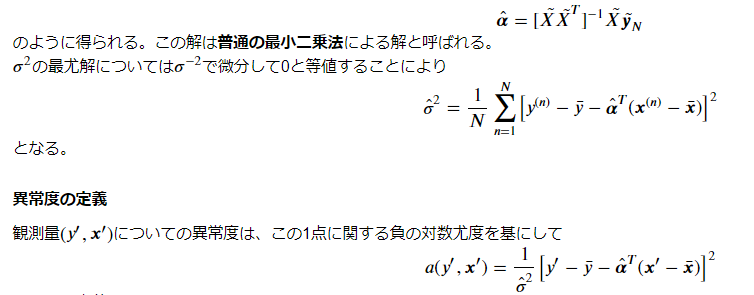

threshold:  0.6021937778163713


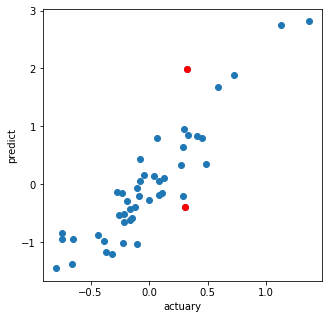

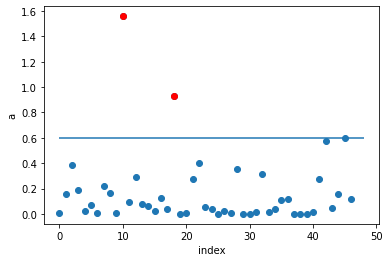

In [7]:
from sklearn.cross_decomposition import CCA
from scipy import linalg

y = data['y']
X = data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]

# 各種次元
dx = 14 # xの次元
dy = 1 # yの次元
N = len(y) # データ数

# 標準化
X_ = np.array(X).T
Xc = (X_ - np.mean(X_, axis=1).reshape(dx,1))/np.std(X_, ddof=0, axis=1).reshape(dx,1)
y_ = np.array(y).reshape(dy,N)
yc = (y_-y_.mean())/y_.std(ddof=0)

# CCA
cca = CCA(n_components=1)
cca.fit(Xc.T, yc.T)

# 正準変数
f1_cca, g1_cca = cca.transform(Xc.T, yc.T)

# 回帰係数の計算
alpha1 = linalg.inv(f1_cca.T@f1_cca)@f1_cca.T@g1_cca

# σ2の計算
sig2 = np.sum((g1_cca.T - alpha1*f1_cca)[0]**2) / N

# 異常度の計算
a = (g1_cca - alpha1*f1_cca)**2/sig2
a = a.T[0]

# 閾値の設定
# 上側95%を閾値に設定
th = np.sort(a)[int(np.floor(N*(1-0.05)))]
print('threshold: ', th)

# 正解値と予測値のプロット
plt.figure(figsize=(5,5))
plt.plot(f1_cca, g1_cca, 'o')
plt.plot(f1_cca[a>th], g1_cca[a>th], 'ro')
plt.xlabel('actuary')
plt.ylabel('predict')
plt.show()

# 各データ点の異常度をプロット
plt.plot(np.arange(N), a, 'o')
plt.plot(np.arange(N)[a>th], a[a>th], 'ro')
plt.hlines(th, 0, 48)
plt.xlabel('index')
plt.ylabel('a')
plt.show()

In [208]:
f1_cca = f1_cca.T
g1_cca = g1_cca.T

alpha1_cca = np.linalg.inv(f1_cca@f1_cca.T)@f1_cca@g1_cca.T
sig2_cca = np.sum((g1_cca - alpha1_cca*f1_cca)**2) / N
a_cca = (g1_cca - alpha1_cca*f1_cca)**2/sig2_cca

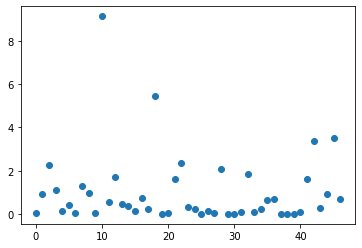

In [209]:
plt.plot(a_cca[0], 'o');

In [25]:
import inspect
import os
print(inspect.getsource(PLSSVD))

class PLSSVD(TransformerMixin, BaseEstimator):
    """Partial Least Square SVD.

    This transformer simply performs a SVD on the crosscovariance matrix X'Y.
    It is able to project both the training data `X` and the targets `Y`. The
    training data X is projected on the left singular vectors, while the
    targets are projected on the right singular vectors.

    Read more in the :ref:`User Guide <cross_decomposition>`.

    .. versionadded:: 0.8

    Parameters
    ----------
    n_components : int, default=2
        The number of components to keep. Should be in `[1,
        min(n_samples, n_features, n_targets)]`.

    scale : bool, default=True
        Whether to scale `X` and `Y`.

    copy : bool, default=True
        Whether to copy `X` and `Y` in fit before applying centering, and
        potentially scaling. If False, these operations will be done inplace,
        modifying both arrays.

    Attributes
    ----------
    x_weights_ : ndarray of shape (n_features, n_compo

In [26]:
CCA

sklearn.cross_decomposition._pls.CCA